In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
#from plotly.offline import plot
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
#import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split,KFold,cross_val_score
import re
import json
from pandas.io.json import json_normalize


In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import statistics 
from sklearn.preprocessing import StandardScaler
import copy
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_pca_correlation_graph
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
#from plotly.offline import plot
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
#import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split,KFold,cross_val_score
import re
import json
from pandas.io.json import json_normalize

In [4]:
# read the csv file
crimedata = pd.read_csv("data_clean.csv") # Read the csv file into dataframe

print (crimedata.info())

crimedata

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Columns: 102 entries, Unnamed: 0 to ViolentCrimesPerPop
dtypes: float64(101), int64(1)
memory usage: 1.6 MB
None


,Unnamed: 0,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,1988,0.02,0.41,1.00,0.21,0.02,0.01,0.54,0.57,0.43,...,0.01,0.75,0.57,0.74,0.71,0.03,0.17,0.02,0.00,0.19
1989,1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,...,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.09
1990,1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,...,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00,0.45
1991,1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.23


In [5]:
circledata = crimedata[['ViolentCrimesPerPop', 'PctKids2Par','PctIlleg','PctFam2Par','PctTeen2Par','PctYoungKids2Par','racepctblack','racePctWhite']].copy()




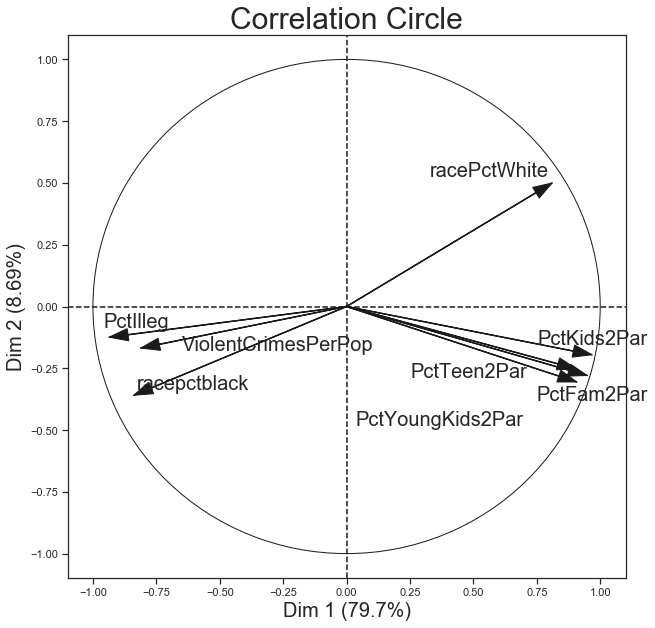

In [6]:
X = circledata.values

features =circledata.columns
#X = StandardScaler().fit_transform(x)

X_norm = X / X.std(axis=0) # Normalizing the feature columns is recommended


figure, correlation_matrix = plot_pca_correlation_graph(X_norm, 
                                                        features,
                                                        figure_axis_size=10)

In [7]:
## Check if there is multicollinearity between any of the explanatory variables under study
cols = ['ViolentCrimesPerPop', 'PctKids2Par','PctIlleg','PctFam2Par','PctTeen2Par','PctYoungKids2Par','racepctblack','racePctWhite',
       'PctHousNoPhone', 'PctUnemployed', 'PctPopUnderPov', 'PctPersOwnOccup', 'MalePctDivorce', 'TotalPctDiv', 'FemalePctDiv',
       'pctWPubAsst','pctWInvInc']


crimedata_study = crimedata.filter(cols, axis=1)
corr_crimedata_study = crimedata_study.corr()
iv_corr = corr_crimedata_study.iloc[:-10,:-10]
multicol_limit = 0.7
iv_corr = (iv_corr[abs(iv_corr) > multicol_limit][iv_corr != 1.0]).unstack().to_dict()
iv_multicoll_corr = pd.DataFrame(list(set([(tuple(sorted(key)), iv_corr[key]) for key in iv_corr])), 
        columns=['Independent Variables', 'Correlation Coefficient'])
print (iv_multicoll_corr[iv_multicoll_corr.notnull().all(axis=1)])

                 Independent Variables  Correlation Coefficient
0   (PctKids2Par, ViolentCrimesPerPop)                -0.738550
5             (PctIlleg, racepctblack)                 0.810892
6            (PctFam2Par, PctTeen2Par)                 0.917026
7      (PctTeen2Par, PctYoungKids2Par)                 0.836830
8           (PctFam2Par, racepctblack)                -0.700600
10         (PctKids2Par, racepctblack)                -0.736264
11           (PctFam2Par, PctKids2Par)                 0.985363
13      (PctFam2Par, PctYoungKids2Par)                 0.935619
18        (PctIlleg, PctYoungKids2Par)                -0.812367
23          (PctKids2Par, PctTeen2Par)                 0.907665
24             (PctIlleg, PctKids2Par)                -0.870279
25   (PctFam2Par, ViolentCrimesPerPop)                -0.706857
28             (PctIlleg, PctTeen2Par)                -0.798620
29              (PctFam2Par, PctIlleg)                -0.843362
30     (PctIlleg, ViolentCrimesPerPop)  

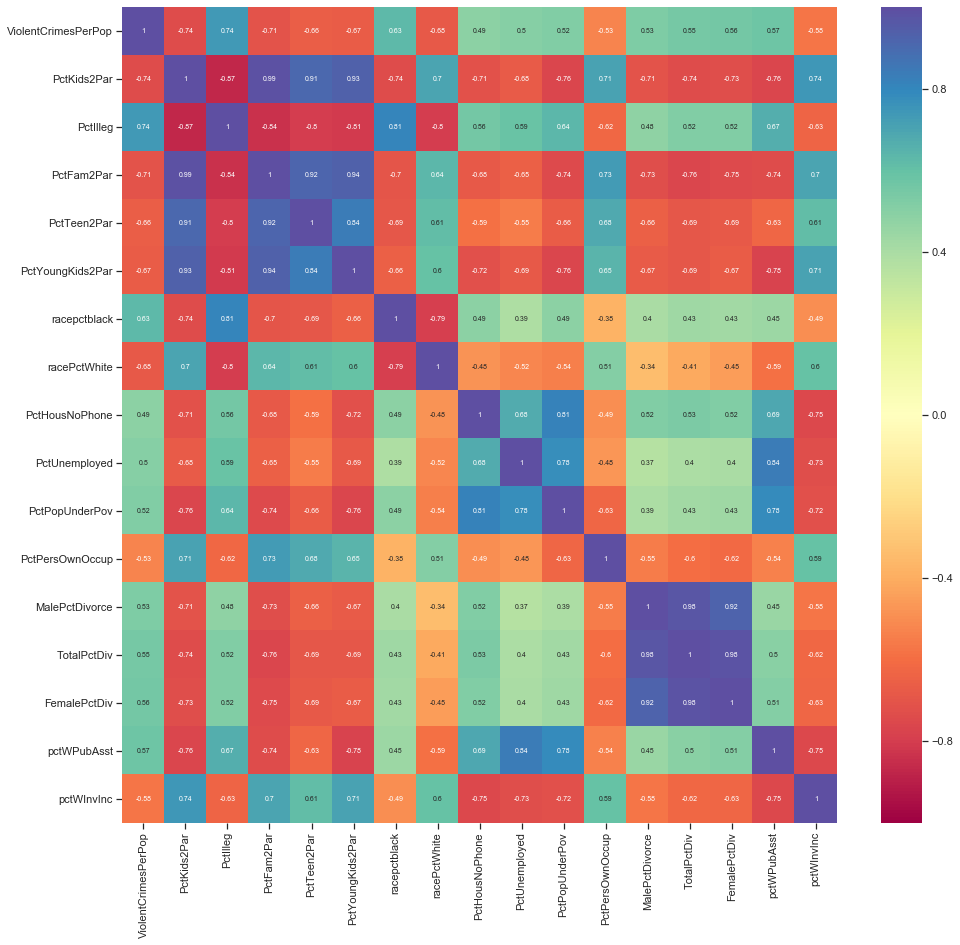

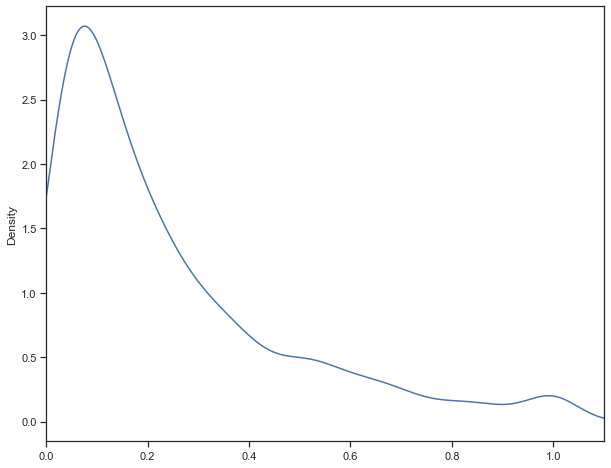

The coeffcients of our model is [-1.14865301  0.32116795  0.53547363  0.02936393  0.09906924  0.01927696]
The intercept for our model is 0.45981653411662093
Linear model Train dataset score is 0.5918921935315213
Linear model Test dataset score is 0.5893129832115696
Cross Validatation Score is [0.63410832 0.61817811 0.47834646 0.67419885 0.49335483 0.58803067
 0.66497588 0.48888726 0.58645915 0.58148177]
Cross Validatation Score mean is 0.580802131957216
Cross Validatation standard deviation is 0.06835490872498384


In [24]:
### Find out the correlation between explanatory and response under study variables. Indepentdent variables under study is limited
### to Income and employment considering the huge number of variables in the dataset
crimedata_reg = crimedata_study
crimedata_reg_corr = crimedata_reg.corr()

### correlation matrix plot
plt.figure(figsize=(16,15))
sns.heatmap(crimedata_reg_corr,annot=True,annot_kws={"size": 7},vmin=-1.0, vmax=1.0,cmap="Spectral")

## "ViolentCrimesPerPop" Density plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax= crimedata_reg['ViolentCrimesPerPop'].plot(kind="kde")
plt.xlim(crimedata_reg['ViolentCrimesPerPop'].min(), crimedata_reg['ViolentCrimesPerPop'].max()*1.1)
plt.show()

## We can see that the density plot is right skewed and further from the boxplot for the response variable "ViolentCrimesPerPop"
## shows the spread of  many outlier data points above the third quartile


## Multiple Linear Regression of variables under study
X = crimedata_reg[['PctKids2Par','PctIlleg','PctFam2Par','PctTeen2Par','PctYoungKids2Par','racepctblack']]
y = crimedata_reg['ViolentCrimesPerPop']
## using statsmodel 
##X = sm.add_constant(X)
##mregmodel = sm.OLS(y,X).fit()
##print (mregmodel.summary())
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)
# fit a model
lm = linear_model.LinearRegression()
mmodel = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
coefficients = mmodel.coef_
print("The coeffcients of our model is {}".format(coefficients))
intercept = mmodel.intercept_
print("The intercept for our model is {}".format(intercept))
print ("Linear model Train dataset score is {}".format(mmodel.score(X_train,y_train)))
print ("Linear model Test dataset score is {}".format(mmodel.score(X_test,y_test)))

##Linear regression using KFold Cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=0)
results = next(kf.split(X), None)
X_train,y_train = X.iloc[results[0]], y.iloc[results[0]]
X_test,y_test = X.iloc[results[1]],y.iloc[results[1]]

lm = linear_model.LinearRegression()
mm_scores = cross_val_score(lm,X,y,cv=kf)
print ("Cross Validatation Score is {}".format(mm_scores))
print ("Cross Validatation Score mean is {}".format(mm_scores.mean()))
print ("Cross Validatation standard deviation is {}".format(mm_scores.std()))

59% of variation in Violent Crime explained by the columns used in circledata

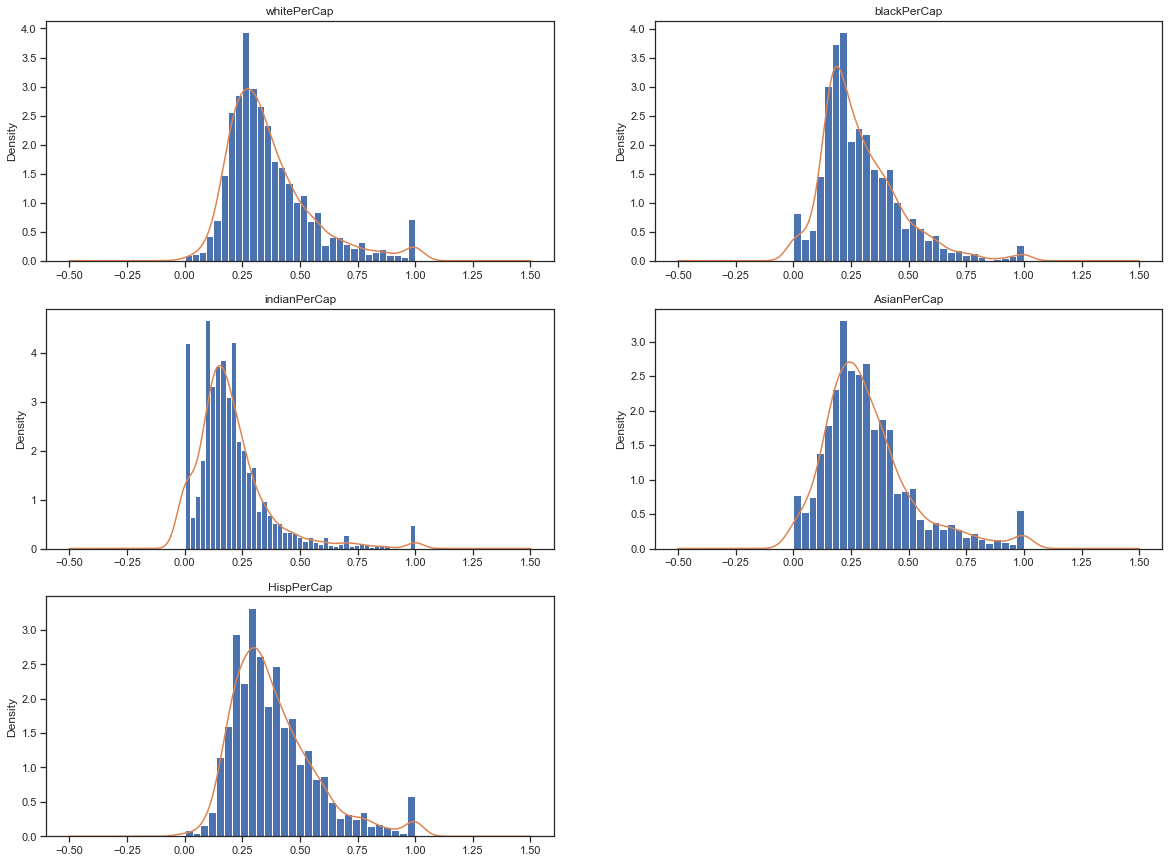

In [10]:
#KERNEL DENSITY ESTIMATION

import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
plt.title('whitePerCap')
crimedata['whitePerCap'].hist(bins='fd', density=True)
crimedata['whitePerCap'].plot(kind='kde')


plt.subplot(3,2,2)
plt.title('blackPerCap')
crimedata['blackPerCap'].hist(bins='fd', density=True)
crimedata['blackPerCap'].plot(kind='kde')

plt.subplot(3,2,3)
plt.title('indianPerCap')
crimedata['indianPerCap'].hist(bins='fd', density=True)
crimedata['indianPerCap'].plot(kind='kde')



plt.subplot(3,2,4)
plt.title('AsianPerCap')
crimedata['AsianPerCap'].hist(bins='fd', density=True)
crimedata['AsianPerCap'].plot(kind='kde')


plt.subplot(3,2,5)

plt.title('HispPerCap')
crimedata['HispPerCap'].hist(bins='fd', density=True)
crimedata['HispPerCap'].plot(kind='kde')

In [11]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

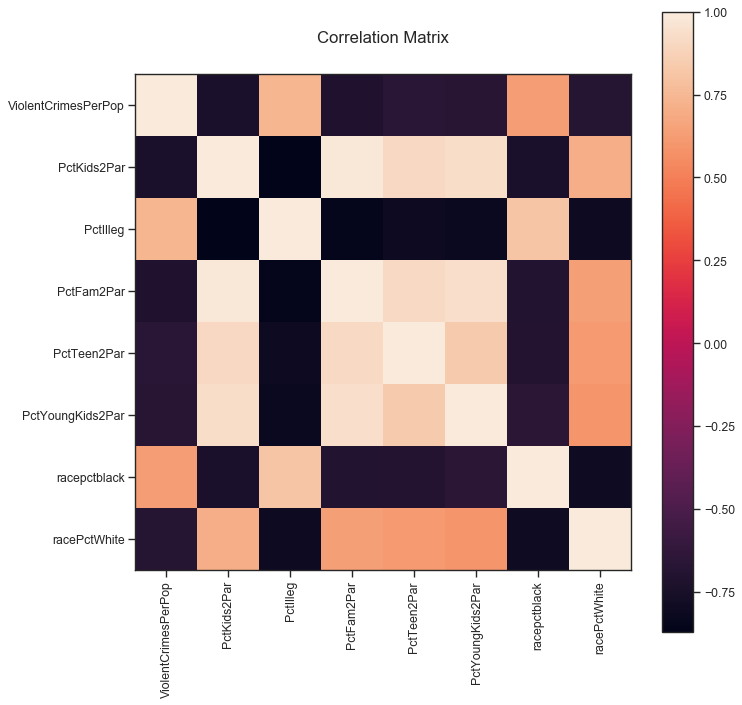

In [26]:
plotCorrelationMatrix(circledata, 10)

In [14]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

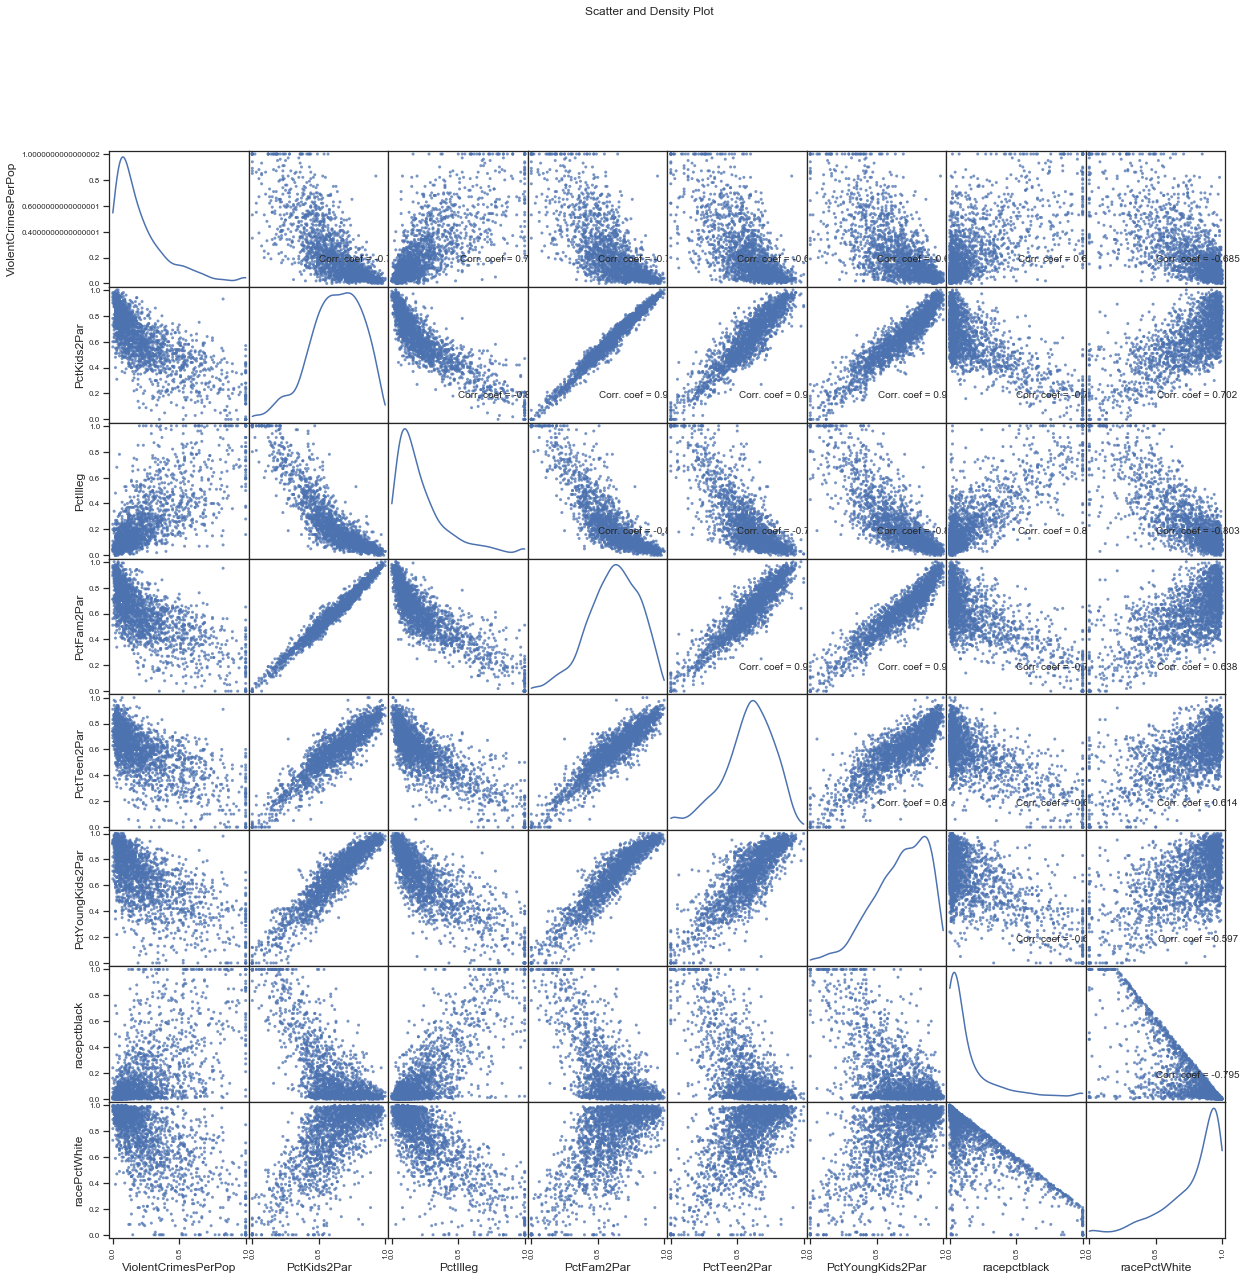

In [15]:
plotScatterMatrix(circledata, 20, 10)

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [20]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
e_X_train = lab_enc.fit_transform(X_train)

ValueError: bad input shape (1793, 6)

In [18]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

ValueError: Unknown label type: 'continuous'

In [19]:
print(X_train)

      PctKids2Par  PctIlleg  PctFam2Par  PctTeen2Par  PctYoungKids2Par  \
0            0.59      0.14        0.55         0.56              0.61   
1            0.47      0.24        0.43         0.39              0.60   
2            0.44      0.46        0.42         0.43              0.43   
3            0.54      0.33        0.65         0.65              0.83   
4            0.91      0.06        0.91         0.85              0.89   
...           ...       ...         ...          ...               ...   
1988         0.14      0.85        0.18         0.15              0.33   
1989         0.68      0.11        0.63         0.59              0.67   
1990         0.63      0.42        0.66         0.70              0.69   
1991         0.42      0.54        0.42         0.47              0.47   
1992         0.65      0.17        0.64         0.71              0.75   

      racepctblack  
0             0.02  
1             0.12  
2             0.49  
3             1.00  
4     